In [1]:
train_file_path= r"C:\Users\pkana\Machine_Learning_Projects\housing\artifact\data_ingestion\2022-09-29-13-48-29\ingested_data\train\housing.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(train_file_path)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [5]:
df.shape

(16512, 10)

In [6]:
df["median_house_value"]

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [7]:
x,y=df.drop(columns=["median_house_value"],axis=1),df["median_house_value"]

In [8]:
x.shape

(16512, 9)

In [9]:
y.shape

(16512,)

In [10]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [11]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
numerical_column=x.drop(columns=["ocean_proximity"],axis=1)

In [14]:
numerical_column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [15]:
simple_imputer=SimpleImputer(strategy="median")

In [16]:
simple_imputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [17]:
df_num=simple_imputer.transform(numerical_column)

In [18]:
df_num

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [19]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [20]:
#Median value for every column

simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [21]:
x['longitude'].median()

-118.51

In [22]:
x['latitude'].median()

34.26

In [23]:
x.ocean_proximity

0            INLAND
1        NEAR OCEAN
2            INLAND
3        NEAR OCEAN
4         <1H OCEAN
            ...    
16507     <1H OCEAN
16508        INLAND
16509     <1H OCEAN
16510     <1H OCEAN
16511        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [24]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [25]:
SimpleImputer(strategy="most_frequent")

SimpleImputer(strategy='most_frequent')

In [26]:
import numpy as np

In [27]:
a=np.arange(1,20)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [28]:
b=np.arange(21,40)
b

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39])

In [29]:
np.c_[a,b]

array([[ 1, 21],
       [ 2, 22],
       [ 3, 23],
       [ 4, 24],
       [ 5, 25],
       [ 6, 26],
       [ 7, 27],
       [ 8, 28],
       [ 9, 29],
       [10, 30],
       [11, 31],
       [12, 32],
       [13, 33],
       [14, 34],
       [15, 35],
       [16, 36],
       [17, 37],
       [18, 38],
       [19, 39]])

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [33]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('feature_generator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [34]:
df=pd.read_csv(train_file_path)

In [35]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [36]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [52]:
num_col_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [53]:
cat_col_names=['ocean_proximity']

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))

])

In [56]:
preprocessing=ColumnTransformer(
    [('num_pipeline',num_pipeline,num_col_names),
    ('cat_pipeline',cat_pipeline,cat_col_names)]

)

In [57]:
preprocessing.fit_transform(df)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  2.9869105 ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
import dill

## To create pickle file:

In [59]:
with open("preprocessing.pkl",'wb') as prep_file:
    dill.dump(preprocessing,prep_file)

## To call Pickle file

In [60]:
with open("preprocessing.pkl","rb") as prep_obj:
    preprocessing_loaded_object=dill.load(prep_obj)

In [61]:
train_df=preprocessing_loaded_object.transform(df)

In [62]:
train_df.shape

(16512, 16)

In [68]:
#Target value
np.array(df.median_house_value)

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [63]:
test_df=pd.read_csv(r"C:\Users\pkana\Machine_Learning_Projects\housing\artifact\data_ingestion\2022-09-29-13-48-29\ingested_data\test\housing.csv")

In [85]:
test_df_transformed=preprocessing_loaded_object.fit_transform(test_df)

In [65]:
df.shape

(16512, 10)

In [69]:
train_df=preprocessing_loaded_object.transform(df)

In [70]:
x=train_df

In [71]:
y=np.array(df.median_house_value)

In [72]:
y

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [66]:
from sklearn.linear_model import LinearRegression

In [73]:
lr=LinearRegression()

In [74]:
lr.fit(x,y)

LinearRegression()

In [75]:
lr.coef_

array([-5.58836318e+04, -5.64501190e+04,  1.37922421e+04, -2.43740084e+03,
        8.41701118e+03, -4.90226176e+04,  4.92612025e+04,  7.36266857e+04,
        4.59112645e+03,  1.42935090e+02,  8.90475252e+03,  1.93241104e+14,
        1.79991387e+14,  1.04668300e+13,  1.20216250e+14,  1.30347358e+14])

In [76]:
lr.intercept_

-388402714149423.1

In [77]:
y_hat=lr.predict(x)

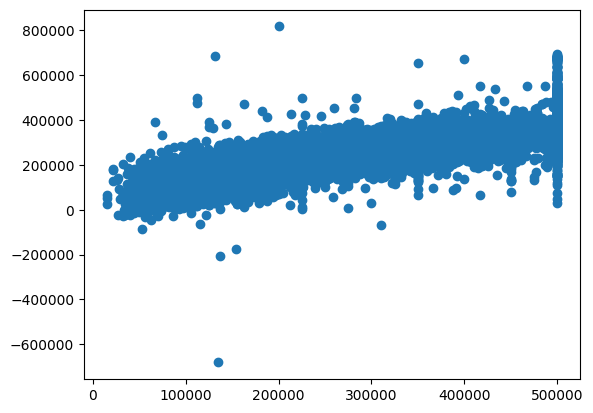

In [79]:
plt.plot(y,y_hat,"o")

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2_score(y,y_hat)

0.6480551770793969

In [84]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [86]:
y_hat_test=lr.predict(test_df_transformed)

In [87]:
y_test=np.array(test_df.median_house_value)

In [88]:
r2_score(y_test,y_hat_test)

0.6563858230625352